In [1]:
from damask_local import main as dsk

In [2]:
elasticity = dsk.list_elasticity("Al")
plasticity = dsk.list_plasticity("Al")

In [3]:
phase = dsk.get_phase(elasticity=elasticity, plasticity=plasticity)

In [4]:
rotation = dsk.get_rotation()

/Users/waseda/dev/damask_local/damask_local/main.py:61: UserWarning: 'shape' not provided, using default: 8
  warnings.warn(f"'{name}' not provided, using default: {default_val.default}")


In [5]:
loading = dsk.apply_tensile_strain()

/Users/waseda/dev/damask_local/damask_local/main.py:61: UserWarning: 'strain' not provided, using default: 0.001
  warnings.warn(f"'{name}' not provided, using default: {default_val.default}")
/Users/waseda/dev/damask_local/damask_local/main.py:61: UserWarning: 'default' not provided, using default: dot_F
  warnings.warn(f"'{name}' not provided, using default: {default_val.default}")


In [6]:
homogenization = dsk.get_homogenization()

material = dsk.get_material(
    rotation=rotation,
    phase=phase,
    homogenization=homogenization,
)

grid = dsk.get_grid(num_grains=len(rotation))

loading = dsk.apply_tensile_strain()

/Users/waseda/dev/damask_local/damask_local/main.py:61: UserWarning: 'box_size' not provided, using default: 1e-05
  warnings.warn(f"'{name}' not provided, using default: {default_val.default}")
/Users/waseda/dev/damask_local/damask_local/main.py:61: UserWarning: 'spatial_discretization' not provided, using default: 16
  warnings.warn(f"'{name}' not provided, using default: {default_val.default}")


In [7]:
process, stdout, stderr, path = dsk.run_damask(material=material, loading=loading, grid=grid)

In [8]:
results = dsk.get_results(path=path)

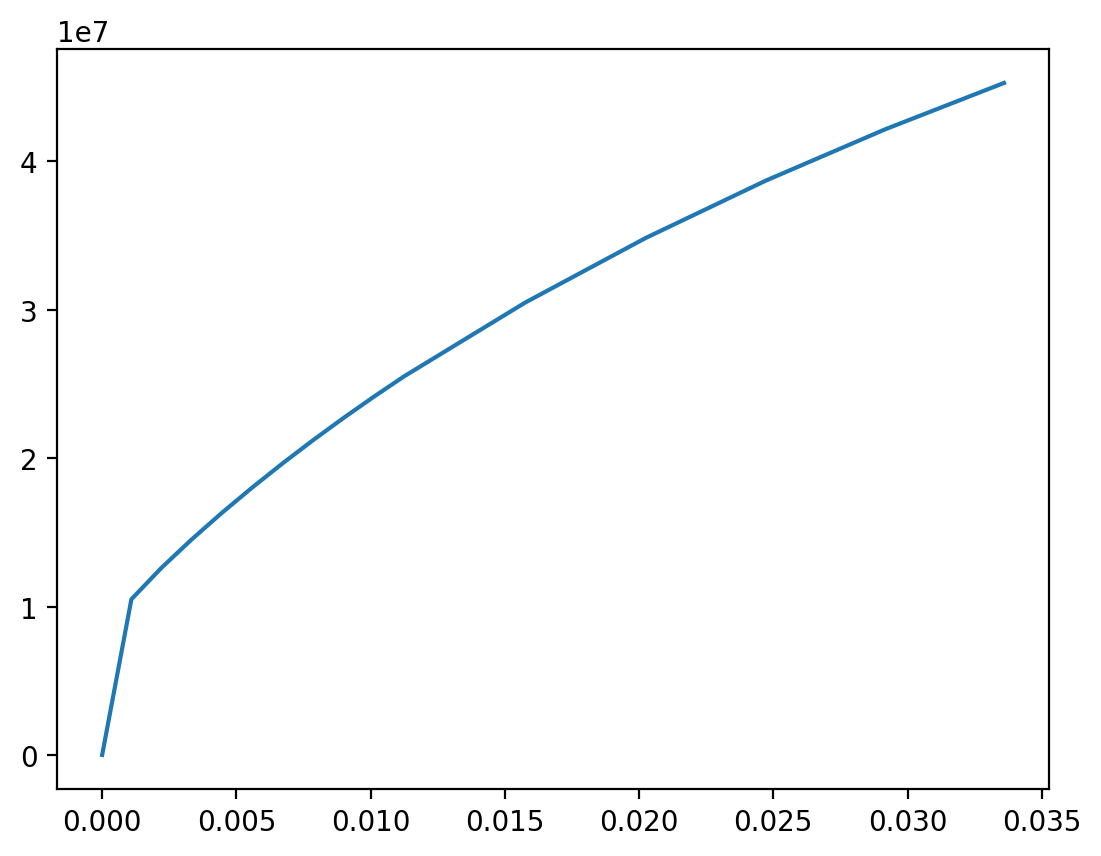

In [9]:
import matplotlib.pylab as plt
%matplotlib inline

plt.plot(results[-1], results[-2])
plt.show()